(multi-dimensional-image-stacks)=
# Mehrdimensionale Bildstapel
Mehrdimensionale Bilddaten können auf ähnliche Weise wie [Mehrkanal-Bilddaten](https://nbviewer.jupyter.org/github/BiAPoL/Bio-image_Analysis_with_Python/blob/main/image_processing/03_multi_channel_image_data.ipynb) gehandhabt werden.

## Dreidimensionale Bildstapel
Es gibt auch Bilder mit drei räumlichen Dimensionen: X, Y und Z. Typische Beispiele finden Sie in der Mikroskopie und in der medizinischen Bildgebung. Werfen wir einen Blick auf einen Magnetresonanztomographie (MRT) Datensatz:

In [1]:
from skimage.io import imread
from pyclesperanto_prototype import imshow
image_stack = imread('../../data/Haase_MRT_tfl3d1.tif')

In [2]:
image_stack.shape

(192, 256, 256)

Wir sehen, dass die Daten tatsächlich drei Dimensionen haben, in diesem Fall 192 Z-Ebenen und 256 X- und Y-Pixel. Wir können sie mit pyclesperantos ```imshow``` anzeigen:

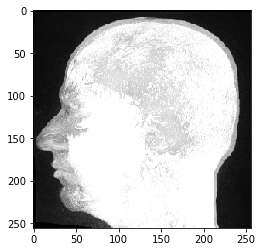

In [3]:
imshow(image_stack)

Dieser MRT-Datensatz sieht ungewöhnlich aus, weil wir eine Maximumintensitätsprojektion betrachten, die pyclesperantos Standardmethode zur Visualisierung dreidimensionaler Daten ist.

## Bildschnitte
Wir können einzelne Bildschnitte untersuchen, indem wir ihren Index in unserem 3D-Numpy-Array angeben und diesmal Matplotlibs ```imshow``` zur Visualisierung verwenden:

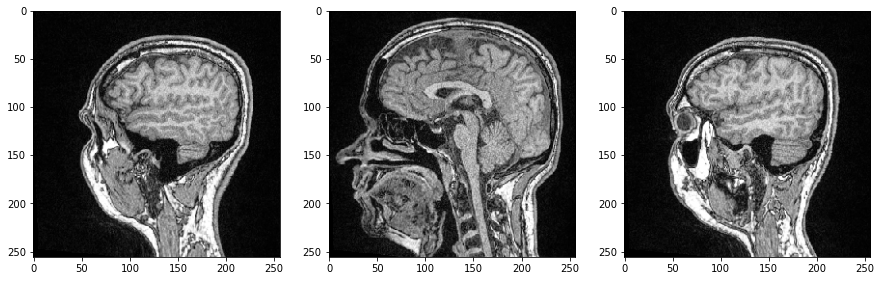

In [4]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(15,15))

# zeige drei planare Bilder
axs[0].imshow(image_stack[48], cmap='Greys_r')
axs[1].imshow(image_stack[96], cmap='Greys_r')
axs[2].imshow(image_stack[144], cmap='Greys_r');

Da alle drei Dimensionen räumliche Dimensionen sind, können wir auch Schnitte orthogonal zur Bildebene und entsprechend den [Anatomischen Ebenen](https://de.wikipedia.org/wiki/Anatomische_Lage-_und_Richtungsbezeichnungen) erstellen. Um die Bilder korrekt auszurichten, können wir ihre Achsen transponieren, indem wir am Ende `.T` hinzufügen.

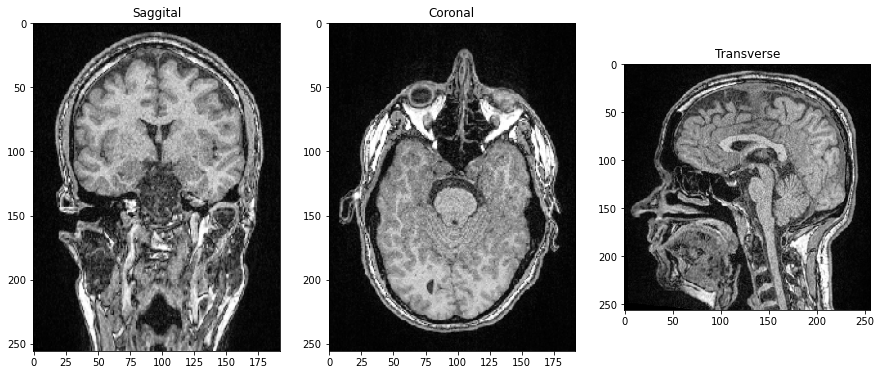

In [5]:
saggital = image_stack[:,:,128].T
coronal = image_stack[:,128,:].T
transverse = image_stack[96]

fig, axs = plt.subplots(1, 3, figsize=(15,15))

# zeige orthogonale Ebenen
axs[0].imshow(saggital, cmap='Greys_r')
axs[0].set_title('Sagittal')

axs[1].imshow(coronal, cmap='Greys_r')
axs[1].set_title('Koronal')

axs[2].imshow(transverse, cmap='Greys_r')
axs[2].set_title('Transversal');

## Videos
Wenn ein Bilddatensatz eine zeitliche Dimension hat, nennen wir ihn ein Video. Die Verarbeitung von Videos funktioniert ähnlich wie bei Mehrkanal-Bildern und Bildstapeln. Öffnen wir einen Mikroskopie-Datensatz, der Hefezellen zeigt, die sich im Laufe der Zeit abrunden. (Bilddaten mit freundlicher Genehmigung von Anne Esslinger, Alberti-Labor, MPI CBG)

In [6]:
video = imread('../../data/rounding_assay.tif')

video.shape

(64, 512, 512)

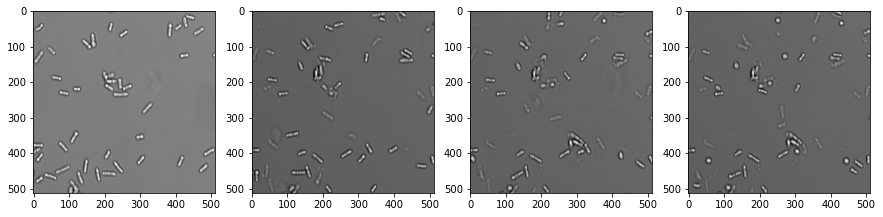

In [7]:
fig, axs = plt.subplots(1, 4, figsize=(15,15))

# zeige drei planare Bilder
axs[0].imshow(video[0], cmap='Greys_r')
axs[1].imshow(video[5], cmap='Greys_r')
axs[2].imshow(video[10], cmap='Greys_r')
axs[3].imshow(video[15], cmap='Greys_r');

## n-dimensionale Daten
Hochdimensionale Daten sind in der Mikroskopie ziemlich häufig. Um sie korrekt zu verarbeiten, muss man sorgfältig untersuchen, welche Dimensionen ein Bilddatensatz hat. Wir können die Möglichkeiten anhand des `mitosis`-Datensatzes erkunden:

In [8]:
mitosis = imread('../../data/mitosis.tif')

mitosis.shape

(51, 5, 2, 196, 171)

Tipp: Öffnen Sie den Datensatz in ImageJ/Fiji, um zu verstehen, wofür diese Zahlen stehen. Sie können dort sehen, dass der Mitose-Datensatz
* 51 Frames,
* 5 Z-Schnitte,
* 2 Kanäle und
* eine Größe von 171 x 196 Pixeln hat.

Wir greifen jetzt die Kanäle 1 und 2 des ersten Zeitpunkts (Index 0) in der mittleren Ebene (Index 2) heraus:

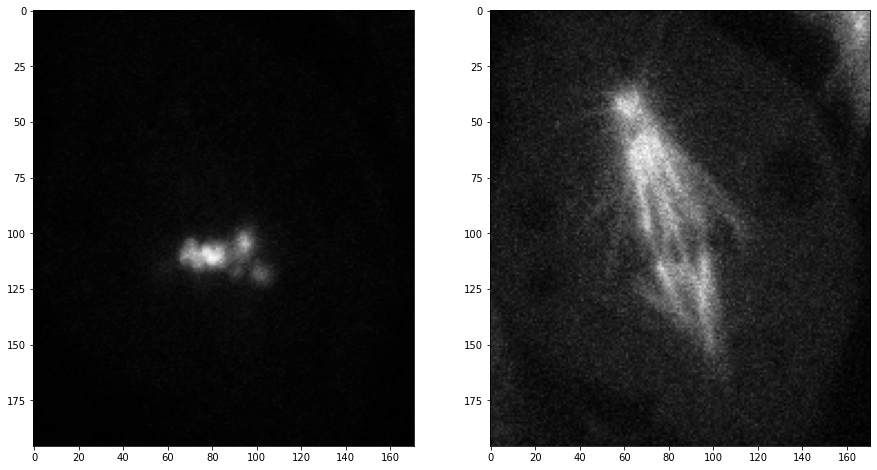

In [9]:
timepoint = 0
plane = 2

channel1 = mitosis[timepoint, plane, 0]
channel2 = mitosis[timepoint, plane, 1]

fig, axs = plt.subplots(1, 2, figsize=(15,15))

axs[0].imshow(channel1, cmap='Greys_r')
axs[1].imshow(channel2, cmap='Greys_r');

## Übung
Öffnen Sie den Mitose-Datensatz, wählen Sie drei Zeitpunkte aus und zeigen Sie sie nebeneinander. Die resultierende Abbildung sollte drei Spalten und zwei Zeilen haben. In der ersten Zeile wird Kanal 1 angezeigt und der zweite Kanal darunter.